In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
df=pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')

In [3]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
df.isnull().any()


Unnamed: 0            False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [6]:
import seaborn as sns


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='work_year', ylabel='Density'>

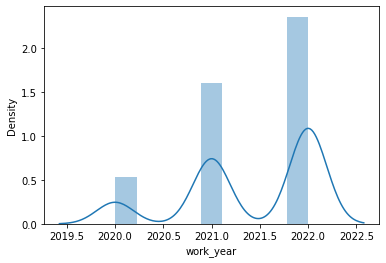

In [7]:
sns.distplot(df['work_year'])

<AxesSubplot:xlabel='experience_level', ylabel='salary'>

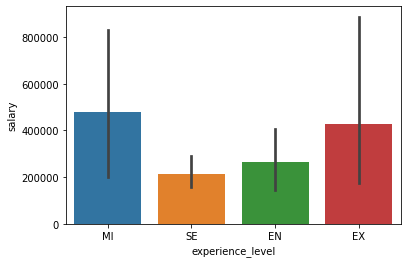

In [8]:
sns.barplot(x='experience_level',y='salary',data=df)

In [9]:
curr_names=df['salary_currency'].unique()

In [10]:
for i in curr_names:
    print(i)

EUR
USD
GBP
HUF
INR
JPY
CNY
MXN
CAD
DKK
PLN
SGD
CLP
BRL
TRY
AUD
CHF


In [11]:
df[df['salary_currency']=="EUR"].shape

(95, 12)

In [12]:
for i in curr_names:
    print(i,df[df['salary_currency']==i].shape)
    

EUR (95, 12)
USD (398, 12)
GBP (44, 12)
HUF (2, 12)
INR (27, 12)
JPY (3, 12)
CNY (2, 12)
MXN (2, 12)
CAD (18, 12)
DKK (2, 12)
PLN (3, 12)
SGD (2, 12)
CLP (1, 12)
BRL (2, 12)
TRY (3, 12)
AUD (2, 12)
CHF (1, 12)


In [13]:
for i in range(5,len(curr_names)):
    df=df[df.salary_currency !=curr_names[i]]

In [14]:
df.shape

(566, 12)

In [15]:
df.salary_currency.unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR'], dtype=object)

In [16]:
df=df[df.salary_currency !='HUF']

In [17]:
df.shape

(564, 12)

In [18]:
df1=df[df.salary_currency =='EUR']

In [19]:
df2=df[df.salary_currency =='USD']

In [20]:
df3=df[df.salary_currency =='GBP']

In [21]:
df4=df[df.salary_currency =='INR']

In [22]:
df1.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
12,12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
17,17,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S
22,22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L


In [23]:
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S


In [24]:
df3.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
44,44,2020,MI,FT,Data Engineer,88000,GBP,112872,GB,50,GB,L
46,46,2020,MI,FT,Data Scientist,60000,GBP,76958,GB,100,GB,S
72,72,2021,EN,FT,Research Scientist,60000,GBP,82528,GB,50,GB,L
105,105,2021,MI,FT,Data Analyst,37456,GBP,51519,GB,50,GB,L


In [25]:
df4.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
18,18,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
21,21,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,100,IN,L
50,50,2020,EN,FT,Data Analyst,450000,INR,6072,IN,0,IN,S
77,77,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M


In [26]:
df1.employment_type.unique()

array(['FT', 'PT', 'CT'], dtype=object)

In [27]:
df1=df1.drop(['salary_currency','Unnamed: 0'],axis=1)
df2=df2.drop(['salary_currency','Unnamed: 0'],axis=1)
df3=df3.drop(['salary_currency','Unnamed: 0'],axis=1)
df4=df4.drop(['salary_currency','Unnamed: 0'],axis=1)

In [28]:
df1=df1.drop(['salary',],axis=1)
df2=df2.drop(['salary',],axis=1)
df3=df3.drop(['salary',],axis=1)
df4=df4.drop(['salary',],axis=1)

In [29]:
df1

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
10,2020,EN,FT,Data Scientist,51321,FR,0,FR,S
12,2020,EN,FT,Data Scientist,39916,FR,0,FR,M
17,2020,SE,FT,Big Data Engineer,114047,PL,100,GB,S
22,2020,SE,FT,Data Engineer,47899,GR,50,GR,L
...,...,...,...,...,...,...,...,...,...
500,2022,SE,FT,Machine Learning Engineer,62651,NL,100,NL,L
501,2022,MI,FT,Head of Data,32974,EE,100,EE,S
507,2022,MI,FT,Research Scientist,64849,AT,0,AT,L
513,2022,SE,FT,Machine Learning Engineer,71444,IE,100,IE,S


In [30]:
import sklearn.preprocessing as preprocessing

le = preprocessing.LabelEncoder()
df1 = df1.apply(le.fit_transform)
df2 = df2.apply(le.fit_transform)
df3 = df3.apply(le.fit_transform)
df4 = df4.apply(le.fit_transform)

In [31]:
df1

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2,1,10,56,2,0,3,0
10,0,0,1,10,28,5,0,7,2
12,0,0,1,10,13,5,0,7,1
17,0,3,1,1,66,14,2,8,2
22,0,3,1,6,22,6,1,9,0
...,...,...,...,...,...,...,...,...,...
500,2,3,1,16,40,12,2,15,0
501,2,2,1,13,9,3,2,5,2
507,2,2,1,20,43,0,0,0,0
513,2,3,1,16,50,8,2,11,2


In [32]:
df2

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,0,3,2,34,188,19,0,17,2
3,0,2,2,38,7,13,0,13,2
4,0,3,2,32,119,32,1,30,0
5,0,0,2,10,32,32,2,30,0
6,0,3,2,29,158,32,2,30,2
...,...,...,...,...,...,...,...,...,...
602,2,3,2,15,126,32,2,30,1
603,2,3,2,15,92,32,2,30,1
604,2,3,2,10,95,32,0,30,1
605,2,3,2,10,119,32,2,30,1


In [33]:
df3

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,0,2,0,1,20,0,1,0,1
44,0,1,0,3,22,0,1,0,0
46,0,1,0,4,12,0,2,0,2
72,1,0,0,9,14,0,1,0,0
105,1,1,0,2,3,0,1,0,0
111,1,2,0,5,23,0,2,0,1
112,1,2,0,7,18,0,2,0,2
123,1,0,0,0,21,0,0,0,0
171,1,1,0,3,14,0,2,0,0
183,1,2,0,6,7,0,1,0,0


In [34]:
df4

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11,0,2,0,8,19,0,0,2,0
18,0,0,0,6,2,0,1,2,1
21,0,2,0,13,4,0,2,2,0
50,0,0,0,4,4,0,0,2,2
77,1,2,1,0,0,0,1,2,1
92,1,2,0,10,10,0,2,2,0
94,1,0,0,8,15,0,1,2,0
109,1,0,0,5,16,0,2,2,0
127,1,2,0,8,5,0,0,2,2
129,1,3,0,11,20,0,1,2,0


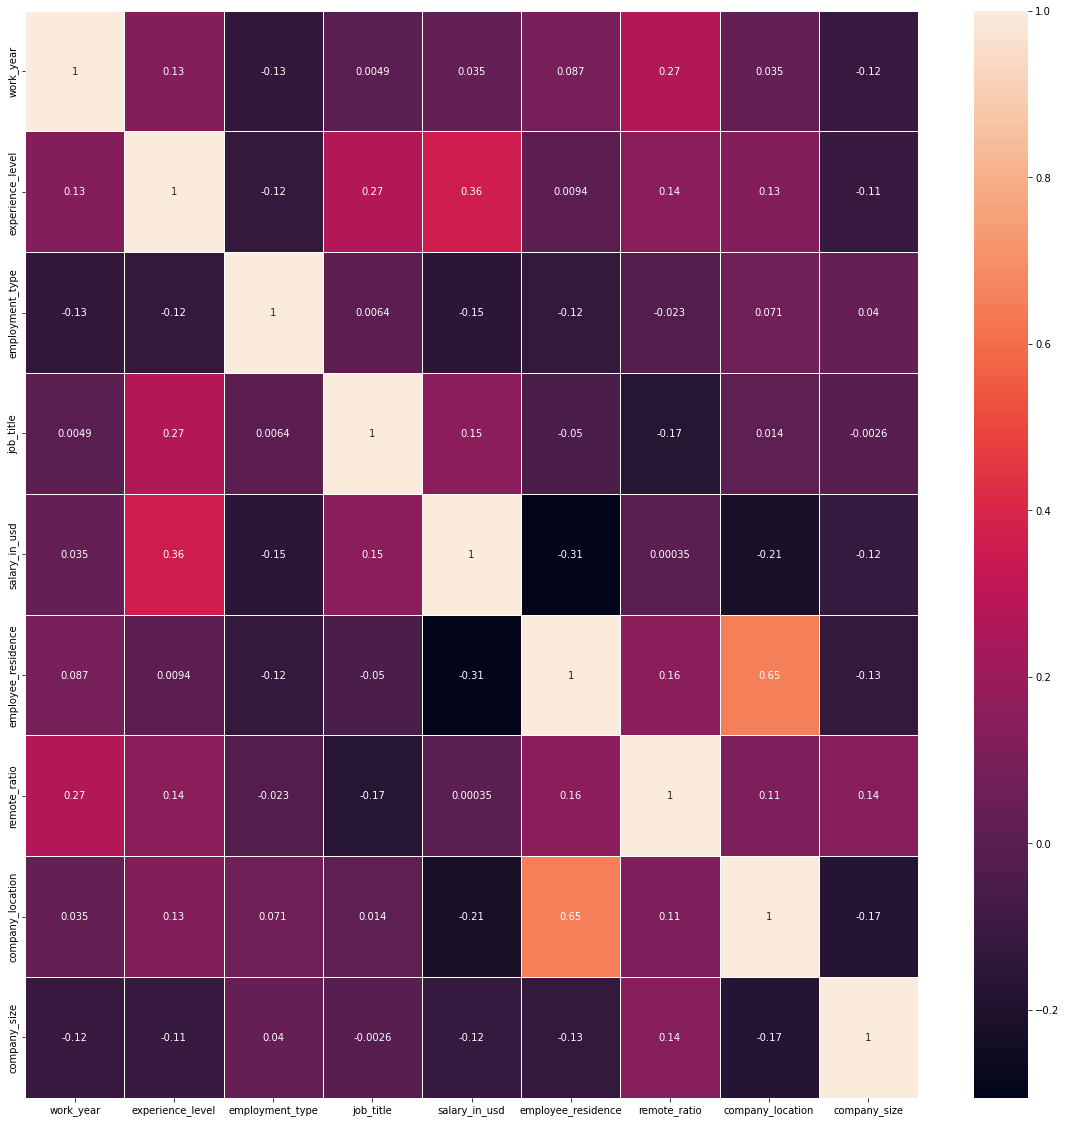

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),linewidths=0.5,annot=True)
plt.show()

In [36]:
df1=df1.drop(['remote_ratio','work_year'],axis=1)

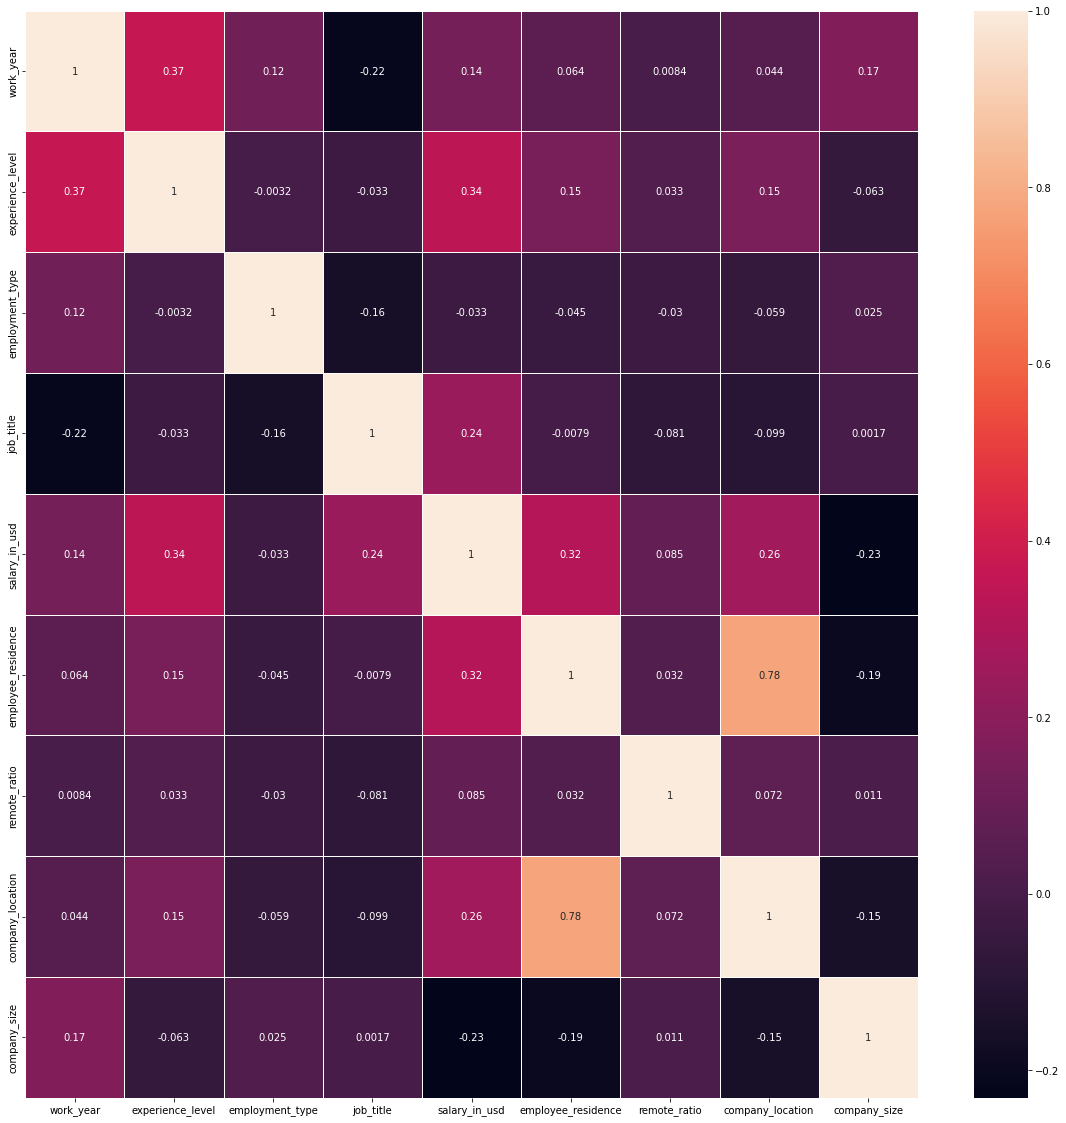

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),linewidths=0.5,annot=True)
plt.show()

In [38]:
df2=df2.drop(['remote_ratio','employment_type'],axis=1)

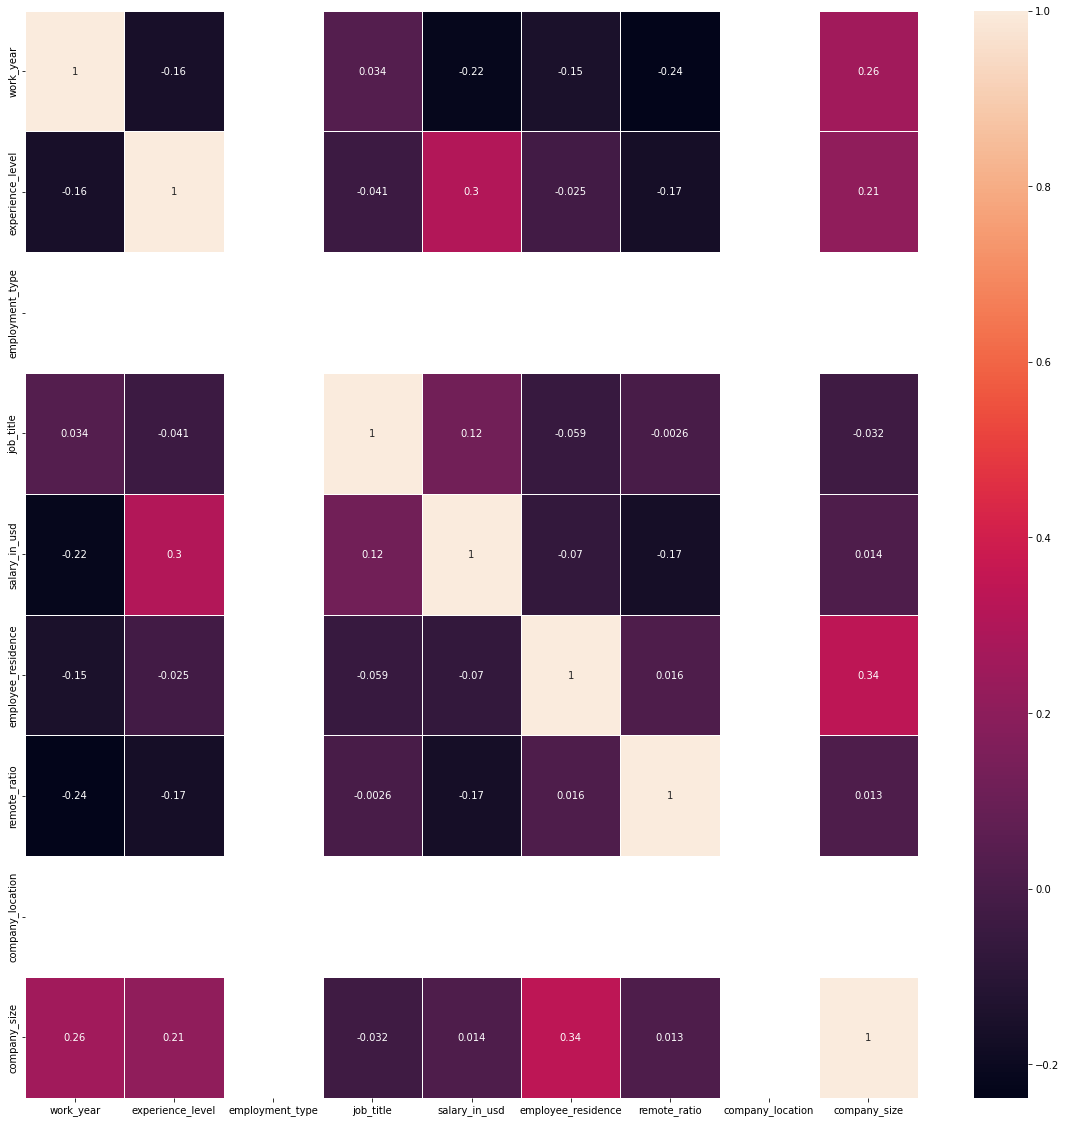

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(),linewidths=0.5,annot=True)
plt.show()

In [40]:
df3=df3.drop(['company_size','company_location','employee_residence','employment_type'],axis=1)

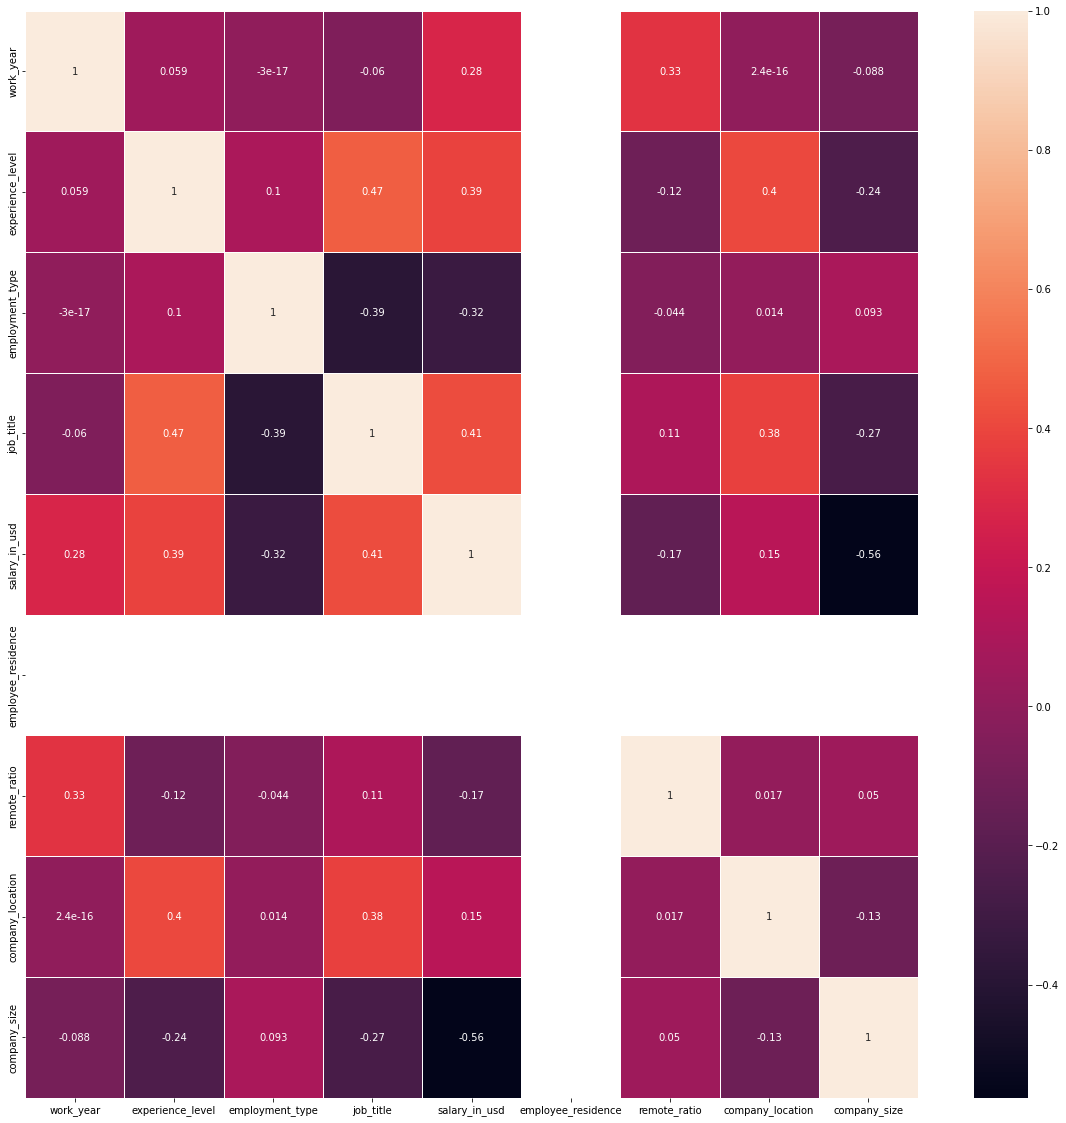

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(),linewidths=0.5,annot=True)
plt.show()

In [42]:
df4=df4.drop(['employee_residence',],axis=1)

In [43]:
X1=df1.drop(['salary_in_usd'],axis=1)
y1=df1['salary_in_usd']

X2=df2.drop(['salary_in_usd'],axis=1)
y2=df2['salary_in_usd']

X3=df3.drop(['salary_in_usd'],axis=1)
y3=df3['salary_in_usd']

X4=df4.drop(['salary_in_usd'],axis=1)
y4=df4['salary_in_usd']

In [44]:
d=[df1,df2,df3,df4]
for i in d:
    print(i.shape)

(95, 7)
(398, 7)
(44, 5)
(27, 8)


In [45]:
from sklearn.model_selection import train_test_split as tts

In [46]:
X1_train,X1_test,y1_train,y1_test= tts(X1,y1,test_size=0.19,random_state=0)
X2_train,X2_test,y2_train,y2_test= tts(X2,y2,test_size=0.19,random_state=0)
X3_train,X3_test,y3_train,y3_test= tts(X3,y3,test_size=0.19,random_state=0)
X4_train,X4_test,y4_train,y4_test= tts(X4,y4,test_size=0.19,random_state=0)

In [47]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [48]:
pipelines = {
    'lin_r':make_pipeline(StandardScaler(), LinearRegression()),
    'rfr':make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=1000)),
    'gbr':make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01)),
    'dtr':make_pipeline(StandardScaler(),DecisionTreeRegressor()),
    'svr':make_pipeline(StandardScaler(),SVR(kernel='rbf')),
    'etr':make_pipeline(StandardScaler(),ExtraTreesRegressor(n_estimators=100, random_state=0)),
    'xgr':make_pipeline(StandardScaler(),XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10))
}

In [49]:
fit_models1 = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X1_train, y1_train)
    fit_models1[algo] = model
    


[20:53:30] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [50]:
from sklearn.metrics import mean_squared_error
!pip install pytest-warnings
import warnings
warnings.filterwarnings("ignore")


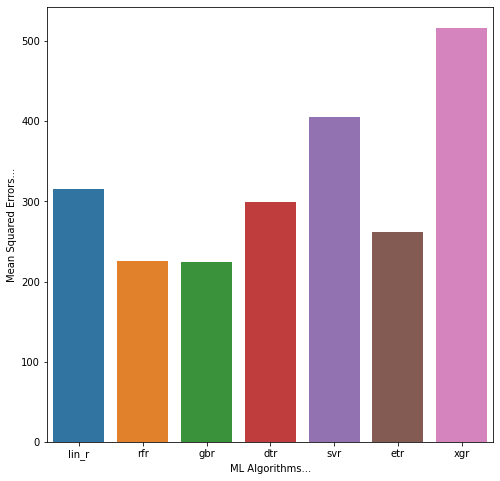

In [51]:
al=[]
ac=[]
for algo, model in fit_models1.items():
    yhat = model.predict(X1_test)
    al.append(algo)
    ac.append(mean_squared_error(y1_test, yhat))
    
for i in range(0,len(ac)):
  ac[i]=round(ac[i],2)

%matplotlib inline
plt.figure(figsize=(8,8))
plt.xlabel('ML Algorithms...')
plt.ylabel('Mean Squared Errors...')
ax=sns.barplot(al,ac)
#ax.bar_label(ax.containers[0])
plt.show()

[20:53:43] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


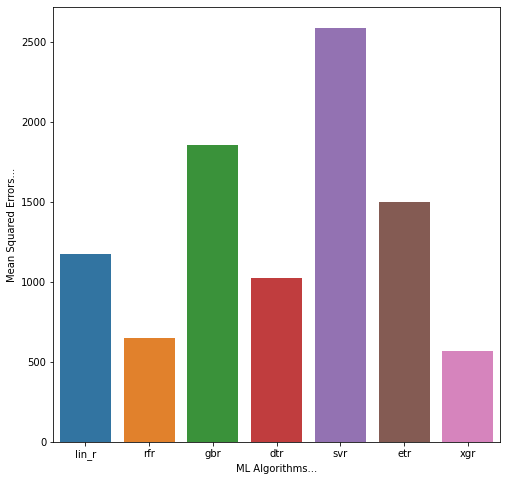

In [52]:
fit_models2 = {}
for algo, pipeline in pipelines.items():
    model1 = pipeline.fit(X2_train, y2_train)
    fit_models2[algo] = model1
al=[]
ac=[]
for algo, model in fit_models1.items():
    yhat = model.predict(X1_test)
    al.append(algo)
    ac.append(mean_squared_error(y1_test, yhat))
    
for i in range(0,len(ac)):
  ac[i]=round(ac[i],2)

%matplotlib inline
plt.figure(figsize=(8,8))
plt.xlabel('ML Algorithms...')
plt.ylabel('Mean Squared Errors...')
ax=sns.barplot(al,ac)
#ax.bar_label(ax.containers[0])
plt.show()

[20:53:45] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


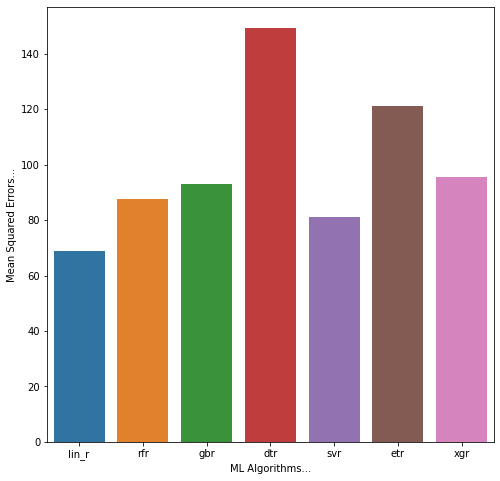

In [53]:
fit_models3 = {}
for algo2, pipeline2 in pipelines.items():
    model2 = pipeline2.fit(X3_train, y3_train)
    fit_models3[algo2] = model2
    
al=[]
ac=[]
for algo, model in fit_models1.items():
    yhat = model.predict(X3_test)
    al.append(algo)
    ac.append(mean_squared_error(y3_test, yhat))
    
for i in range(0,len(ac)):
  ac[i]=round(ac[i],2)

%matplotlib inline
plt.figure(figsize=(8,8))
plt.xlabel('ML Algorithms...')
plt.ylabel('Mean Squared Errors...')
ax=sns.barplot(al,ac)
#ax.bar_label(ax.containers[0])
plt.show()

[20:53:47] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


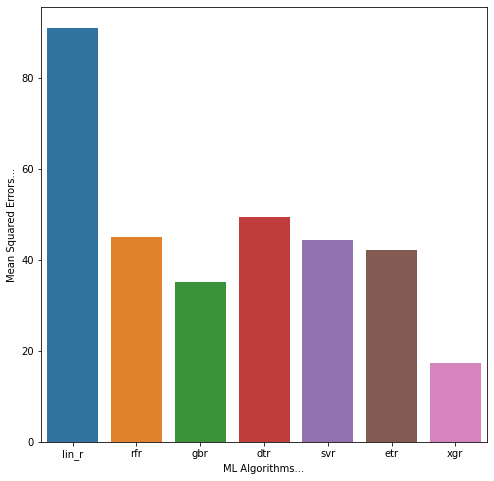

In [54]:
fit_models4 = {}
for algo3, pipeline3 in pipelines.items():
    model3 = pipeline3.fit(X4_train, y4_train)
    fit_models4[algo3] = model3
    
    
al=[]
ac=[]
for algo, model in fit_models1.items():
    yhat = model.predict(X4_test)
    al.append(algo)
    ac.append(mean_squared_error(y4_test, yhat))
    
for i in range(0,len(ac)):
  ac[i]=round(ac[i],2)

%matplotlib inline
plt.figure(figsize=(8,8))
plt.xlabel('ML Algorithms...')
plt.ylabel('Mean Squared Errors...')
ax=sns.barplot(al,ac)
#ax.bar_label(ax.containers[0])
plt.show()